In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
project_path =  '/content/drive/My Drive/Colab Data'
os.chdir(project_path)
os.listdir()

df = pd.read_csv('indonesian-sarcasm-balanced-shuffled-v2.csv')

In [ ]:
# df = pd.concat([df1,df2],sort = False)
df.head()

,is_sarcastic,headline
0,0,entah kenapa tapi kebanyakan anak cowok memang...
1,1,"kan ga melengkung, karena bumi itu flat"
2,1,"uh, you don't need that's the core doctrine of..."
3,1,"lelenya atheis, haram"
4,0,"di sini ga bisa sarkasme tanpa "" s"""


Text(0.5, 1.0, 'Data Distribution')

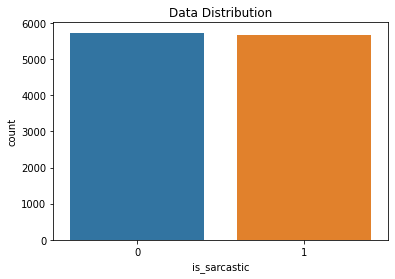

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_sarcastic", data = df)
plt.title("Data Distribution")

Removing punctuation and unnecessary stop words.
Using stemmer to get similar results for different forms of the same words.

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

In [ ]:
x_data = df["headline"].apply(preprocess)
x_data.tail()

11373    yesterday lose cebong vs kampret lose china ka...
11374    2 part question answer pretti long think air f...
11375                           get better game chair case
11376    basebal bat knife enough 1000volt stun gun eno...
11377                                         isi suratnya
Name: headline, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, df['is_sarcastic'].values, test_size=0.10, random_state=42)

Using tf-idf to further minimize the weight of unnecessary words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# # sort ascending
# df_idf.sort_values(by=['idf_weights']).head()

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K-nearest neighbors:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5) #3, 4, 5
knn.fit(x_train_tfidf, y_train)
print(f"Training Score : {knn.score(x_train_tfidf, y_train)}")
print(f"Test Score : {knn.score(x_test_tfidf, y_test)}")

Training Score : 0.760546875
Test Score : 0.6107205623901582


              precision    recall  f1-score   support

           0       0.56      0.98      0.71       567
           1       0.92      0.25      0.39       571

    accuracy                           0.61      1138
   macro avg       0.74      0.61      0.55      1138
weighted avg       0.74      0.61      0.55      1138



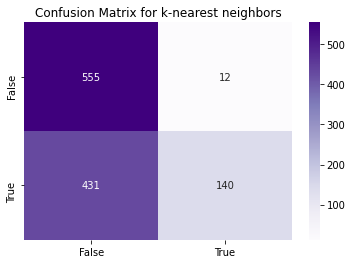

In [ ]:
pred = knn.predict(x_test_tfidf)
cm = metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["False", "True"], columns=["False", "True"])
sns.heatmap(cm, annot = True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix for k-nearest neighbors")

cr = metrics.classification_report(y_test,pred)
print(cr)

Naive Bayes Classifier:

In [ ]:
BernModel = MultinomialNB()
BernModel.fit(x_train_tfidf, y_train)
print(f"Training Score : {BernModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {BernModel.score(x_test_tfidf, y_test)}")

Training Score : 0.904296875
Test Score : 0.8216168717047452


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       567
           1       0.83      0.81      0.82       571

    accuracy                           0.82      1138
   macro avg       0.82      0.82      0.82      1138
weighted avg       0.82      0.82      0.82      1138



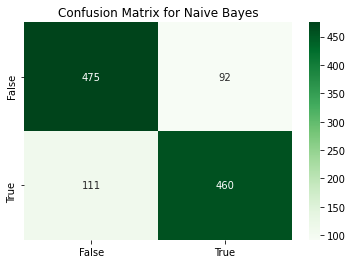

In [ ]:
pred = BernModel.predict(x_test_tfidf)
cm = metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["False", "True"], columns=["False", "True"])
sns.heatmap(cm, annot = True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix for Naive Bayes")

cr = metrics.classification_report(y_test,pred)
print(cr)

Logistic Regression:

In [ ]:
# LogModel = LogisticRegression()
# LogModel.fit(x_train_tfidf,y_train)
# print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
# print(f"Test Score : {LogModel.score(x_test_tfidf, y_test)}")

Support Vector Machine:

In [ ]:
# svm = NuSVC()
# svm.fit(x_train_tfidf,y_train)
# print(f"Training Score : {svm.score(x_train_tfidf, y_train)}")
# print(f"Test Score : {svm.score(x_test_tfidf, y_test)}")

Random Forest Classifier:

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(x_train_tfidf,y_train)
# print(f"Training Score : {rf.score(x_train_tfidf, y_train)}")
# print(f"Test Score : {rf.score(x_test_tfidf, y_test)}")